In [81]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from scipy.sparse import hstack
import string
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline


In [65]:
translator = str.maketrans('', '', string.punctuation)
data = pd.read_csv('DATASET.csv' ,delimiter = '\t', quoting = 3)

In [66]:
data.columns = ['RATING', 'COMMENTS']

In [69]:
data.dropna(axis=0,inplace=True)

In [70]:
data.shape

(9999, 2)

In [71]:
data.head()

,RATING,COMMENTS
0,"""3",I have to say I love most things about Sprouts...
1,"""5",The tire pressure light came on a day or so ag...
2,"""4",Good Pizza and great service!!\nThe date dinne...
3,"""5",Found this place looking for a taqueria on lin...
4,"""3",Its nice to support the locals vs the big chai...


In [74]:
data['RATING'] = [i.split('"')[1] for i in data['RATING']]

In [77]:
data['RATING'] = data['RATING'].astype(int)

In [78]:
data.head()

,RATING,COMMENTS
0,3,I have to say I love most things about Sprouts...
1,5,The tire pressure light came on a day or so ag...
2,4,Good Pizza and great service!!\nThe date dinne...
3,5,Found this place looking for a taqueria on lin...
4,3,Its nice to support the locals vs the big chai...


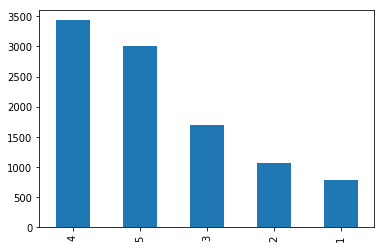

In [85]:
data['RATING'].value_counts().plot(kind='bar')

In [86]:
data.isnull().sum()

RATING      0
COMMENTS    0
dtype: int64

In [87]:
from sklearn.feature_extraction.text import CountVectorizer

In [88]:
#COUNT VECTORIZER for extracting maximum features from SentimentText

In [89]:
count_vec = CountVectorizer(min_df=5, stop_words='english', max_features=1000)

In [90]:
train_vectors_desc = count_vec.fit_transform(data['COMMENTS'])

In [91]:
train_vectors_desc

<9999x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 453784 stored elements in Compressed Sparse Row format>

In [92]:
data['SentimentText LENGTH'] = data['COMMENTS'].apply(str).apply(len)

In [93]:
data['SentimentText COUNT'] = data['COMMENTS'].apply(str).apply(lambda x: len(x.split(' ')))

In [94]:
data.head()

,RATING,COMMENTS,SentimentText LENGTH,SentimentText COUNT
0,3,I have to say I love most things about Sprouts...,900,149
1,5,The tire pressure light came on a day or so ag...,618,106
2,4,Good Pizza and great service!!\nThe date dinne...,748,118
3,5,Found this place looking for a taqueria on lin...,663,110
4,3,Its nice to support the locals vs the big chai...,595,104


In [95]:
data.drop(['COMMENTS'],axis=1,inplace=True)

In [96]:
y = data['RATING']

In [98]:
data.drop(['RATING'],axis=1,inplace=True)

In [99]:
data.head()

,SentimentText LENGTH,SentimentText COUNT
0,900,149
1,618,106
2,748,118
3,663,110
4,595,104


In [100]:
x_train = hstack([data, train_vectors_desc])

In [101]:
model = xgb.XGBClassifier()

In [102]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5] ,'n_estimators': [100,500,700]}
ind_params = {'learning_rate': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 3, n_jobs = -1, verbose=3) 

In [103]:
optimized_GBM.fit(x_train, y)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 55.4min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5], 'n_estimators': [100, 500, 700]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=3)

In [104]:
optimized_GBM.grid_scores_

[mean: 0.46925, std: 0.00164, params: {'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100},
 mean: 0.49135, std: 0.00639, params: {'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 500},
 mean: 0.48945, std: 0.00624, params: {'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 700},
 mean: 0.47115, std: 0.00258, params: {'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100},
 mean: 0.49285, std: 0.00226, params: {'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 500},
 mean: 0.49225, std: 0.00576, params: {'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 700},
 mean: 0.47045, std: 0.00188, params: {'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100},
 mean: 0.49535, std: 0.00682, params: {'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 500},
 mean: 0.49395, std: 0.00559, params: {'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 700},
 mean: 0.47985, std: 0.00328, params: {'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100},


In [105]:
optimized_GBM.best_estimator_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=5, missing=None, n_estimators=500, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [106]:
optimized_GBM.best_score_

0.4953495349534954

In [107]:
from xgboost import XGBClassifier
#Train the model
XGBOOST = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=5, missing=None, n_estimators=500, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

XGBOOST.fit(x_train,y)


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=5, missing=None, n_estimators=500, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [ ]:
#SAVING MODEL

In [43]:
import pickle

with open('XGBOOST.pkl', 'wb') as fid:
    pickle.dump(XGBOOST, fid,2)  